# Data Mining Project
### By:  Group 3: Elio Aybar, Cristal Garcia, Sunny Li, Matt Norgren

### Data Cleaning

In [1]:
#Packages to import
import os
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
#import pandas._testing as tm

pd.set_option('display.max_columns', 100) # Setting pandas to display a N number of columns
pd.set_option('display.max_rows', 10) # Setting pandas to display a N number rows
pd.set_option('display.width', 1000)

from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,VotingClassifier,BaggingRegressor,RandomForestRegressor
from sklearn.model_selection import train_test_split
#from hypopt import GridSearch
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression,Perceptron,SGDRegressor
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
### IMPORT SET

#Change working directory to match where the large files are stored
# it is not best practice to centrally store files this large - although
# git LFS should be explored

### CWD -  MAN
%cd "C:\Users\MAN\OneDrive - The University of Chicago\2020_Autumn\Data Mining Platforms [MSCA 31008]\Group_Project\"
## CWD - Cristal
#%cd "C:\Users\cgarc\OneDrive - The University of Chicago\GitHub\US_HousingData-\docs"
#cd
## CWD - Elio 
#%cd "C:\Users\Tipo\Desktop\GitHub\Project"
## CWD - Sunny
#%cd "/Users/sunny/Data mining/final project"


C:\Users\MAN\OneDrive - The University of Chicago\2020_Autumn\Data Mining Platforms [MSCA 31008]\Group_Project


In [3]:
### Establish Pandas Data Frames / Import

### Zillow Set- Zip 
zip_df = pd.read_csv('Zip_time_series.csv', index_col = 'Date')  ### Issues with NaN on import

## Public School Ratings 
PS_df = pd.read_csv('Public_Schools.csv')

## Starbucks Upto 2017 for 70 Countries
SBUX_df = pd.read_csv('directory.csv')

## Food Desert 
foodlookup_df = pd.read_csv('food_access_variable_lookup.csv')
food_df = pd.read_csv('food_access_research_atlas.csv') 

## Hospital Quality Care 
hospital_df = pd.read_csv('Hospital General Information.csv', encoding="ISO-8859-1")

## Target Up to 2017 for US 
TGT_df = pd.read_csv('target.csv', encoding="ISO-8859-1")

### Individual Set Cleaning (Preparing for Combination)

In [4]:
################################
## Food Desert -- Cleaning CG  #
################################
food_df.shape

(72827, 148)

In [5]:
#Columns to drop
food_df.drop(['GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_Vehicle',  'LATractsVehicle_20', 'LAPOP1_10', 'LAPOP05_10', 'LAPOP1_20', 'LALOWI1_10', 'LALOWI05_10', 'LALOWI1_20', 'lapophalf', 'lapophalfshare', 'lalowihalf', 'lalowihalfshare', 'lakidshalf', 'lakidshalfshare', 'laseniorshalf', 'laseniorshalfshare', 'lawhitehalf', 'lawhitehalfshare', 'lablackhalf', 'lablackhalfshare', 'laasianhalf', 'laasianhalfshare'], axis = 1, inplace = True)
food_df.drop(['lanhopihalf', 'lanhopihalfshare', 'laaianhalf', 'laaianhalfshare', 'laomultirhalf', 'laomultirhalfshare', 'lahisphalf', 'lahisphalfshare', 'lahunvhalf', 'lahunvhalfshare', 'lasnaphalf', 'lasnaphalfshare', 'lapop1', 'lapop1share', 'lalowi1', 'lalowi1share', 'lakids1', 'lakids1share', 'laseniors1', 'laseniors1share', 'lawhite1', 'lawhite1share', 'lablack1', 'lablack1share', 'laasian1', 'laasian1share', 'lanhopi1', 'lanhopi1share', 'laaian1', 'laaian1share', 'laomultir1', 'laomultir1share', 'lahisp1', 'lahisp1share', 'lahunv1', 'lahunv1share'], axis = 1, inplace = True)
food_df.drop(['lasnap1', 'lasnap1share', 'lapop10', 'lapop10share', 'lalowi10', 'lalowi10share', 'lakids10', 'lakids10share', 'laseniors10', 'laseniors10share', 'lawhite10', 'lawhite10share', 'lablack10', 'lablack10share', 'laasian10', 'laasian10share', 'lanhopi10', 'lanhopi10share', 'laaian10', 'laaian10share', 'laomultir10', 'laomultir10share', 'lahisp10', 'lahisp10share', 'lahunv10', 'lahunv10share', 'lasnap10', 'lasnap10share', 'lapop20', 'lapop20share', 'lalowi20', 'lalowi20share', 'lakids20', 'lakids20share', 'laseniors20', 'laseniors20share'], axis = 1, inplace = True)
food_df.drop(['lawhite20', 'lawhite20share', 'lablack20', 'lablack20share', 'laasian20', 'laasian20share', 'lanhopi20', 'lanhopi20share', 'laaian20', 'laaian20share', 'laomultir20', 'laomultir20share', 'lahisp20', 'lahisp20share', 'lahunv20', 'lahunv20share'], axis = 1, inplace = True)
food_df.drop(['LILATracts_1And10', 'LILATracts_halfAnd10', 'LILATracts_1And20', 'HUNVFlag', 'lasnap20', 'lasnap20share', 'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'], axis = 1, inplace = True)
food_df.drop(['LAhalfand10', 'LA1and20', 'LATracts_half', 'LATracts1', 'LATracts10', 'LATracts20'], axis = 1, inplace = True)

In [6]:
#Drop Duplication rows
food_df.drop_duplicates(inplace= True)

In [7]:
#There are rows in the data with censustract numbers that no longer apply and the respective row has zero values. Zipcodes 
#couldn't be identified and were replaced with NA's. Drop these respective rows with NA's in zipcode because those aren't 
#functional censustract numbers and the rows also have 0's for more than 70% of columns
food_df = food_df[food_df['Zipcode'].notna()]

In [8]:
food_df.shape

(72701, 11)

In [9]:
#Check missing values
food_df.apply(lambda x: sum(x.isnull()))

CensusTract           0
Zipcode               0
State                 0
County                0
Urban                 0
                     ..
OHU2010               0
LowIncomeTracts       0
PovertyRate           0
MedianFamilyIncome    0
LA1and10              0
Length: 11, dtype: int64

In [10]:
#Check unique values
food_df.apply(lambda x: len(x.unique()))

CensusTract           72701
Zipcode               17496
State                    51
County                 1837
Urban                     2
                      ...  
OHU2010                4100
LowIncomeTracts           2
PovertyRate             829
MedianFamilyIncome    38925
LA1and10                  2
Length: 11, dtype: int64

In [11]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72701 entries, 0 to 72826
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CensusTract         72701 non-null  int64  
 1   Zipcode             72701 non-null  float64
 2   State               72701 non-null  object 
 3   County              72701 non-null  object 
 4   Urban               72701 non-null  int64  
 5   POP2010             72701 non-null  int64  
 6   OHU2010             72701 non-null  int64  
 7   LowIncomeTracts     72701 non-null  int64  
 8   PovertyRate         72701 non-null  float64
 9   MedianFamilyIncome  72701 non-null  int64  
 10  LA1and10            72701 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 6.7+ MB


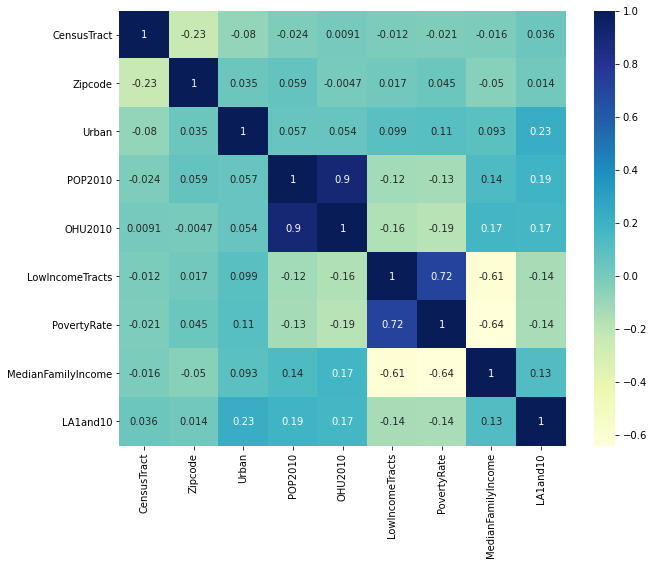

In [12]:
import seaborn as sns
#Visually represent collinearity
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(food_df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [13]:
food_df.shape

(72701, 11)

In [14]:
#Drop because of collinearity
food_df.drop(['POP2010', 'PovertyRate'], axis = 1, inplace = True)

In [15]:
#Groupby Zipcode and find the average of features
food_df = food_df.groupby('Zipcode', as_index=False)['Urban', 'OHU2010', 'LowIncomeTracts', 'MedianFamilyIncome', 'LA1and10'].mean()

In [16]:
food_df.apply(lambda x: len(x.unique()))

Zipcode               17496
Urban                   100
OHU2010                9746
LowIncomeTracts         156
MedianFamilyIncome    16252
LA1and10                124
dtype: int64

In [17]:
food_df.head()

,Zipcode,Urban,OHU2010,LowIncomeTracts,MedianFamilyIncome,LA1and10
0,1001.0,1.000000,2098.000000,0.200000,73672.800000,1.000000
1,1002.0,0.777778,1298.666667,0.666667,76141.333333,0.666667
2,1005.0,0.000000,2025.000000,0.000000,80846.000000,0.000000
3,1007.0,0.000000,2797.500000,0.000000,93071.000000,0.000000
4,1008.0,0.000000,2826.000000,0.000000,79719.000000,1.000000


In [18]:
food_df.shape

(17496, 6)

In [19]:
####################################################################
## Public School Ratings (2014-2015 School years) -- Cleaning CG  ##
####################################################################

PS_df.shape

(102370, 33)

In [20]:
#Change 'LEVEL_' to change to integer (1: elementary, 2: middle school, 3: high school, 4:PK-13, N=0: Not specified)
PS_df['LEVEL_'] = PS_df['LEVEL_'].apply({'N':0, '1':1, '2':2, '3':3, '4':4 }.get)

In [21]:
#Drop ZIP4 because 43% of data missing and already have other location indicators; don't need Telephone, website, source, 
#'VAL_METHOD', 'NAICS_CODE'; 'NAICS_DESC' is generalized description of 'LEVEL'; SHELTER_ID doesn't have 76% of data available 

PS_df.drop(['X', 'Y', 'OBJECTID', 'NCESID', 'ZIP4', 'TELEPHONE', 'NAICS_CODE', 'NAICS_DESC', 'SOURCE', 'VAL_METHOD', 'VAL_DATE',  'WEBSITE', 'ST_GRADE', 'END_GRADE', 'DISTRICTID',  'SHELTER_ID'], axis = 1, inplace = True)

#Drop Puerto Rico location
PS_df = PS_df[PS_df.COUNTRY != 'PRI']

#Drop Country column since all inland
PS_df.drop(['COUNTRY'], axis = 1, inplace = True)

#Convert SOURCEDATE to actual datatime type
PS_df['SOURCEDATE'] = pd.to_datetime(PS_df['SOURCEDATE'])

In [22]:
#Drop Duplication rows
PS_df.drop_duplicates(inplace= True)

In [23]:
#Drop schools with 0 and negative enrolment
PS_df = PS_df[PS_df.ENROLLMENT > 0]

In [24]:
#Drop schools with 0 and negative count of teachers
PS_df = PS_df[PS_df.FT_TEACHER > 0]

In [25]:
#Create Student: Teacher ratio based on enrollment and Teacher count. 30:1 is the ideal ratio 
PS_df['Class_Teacher_RATIO'] = PS_df['ENROLLMENT'] / PS_df['FT_TEACHER']

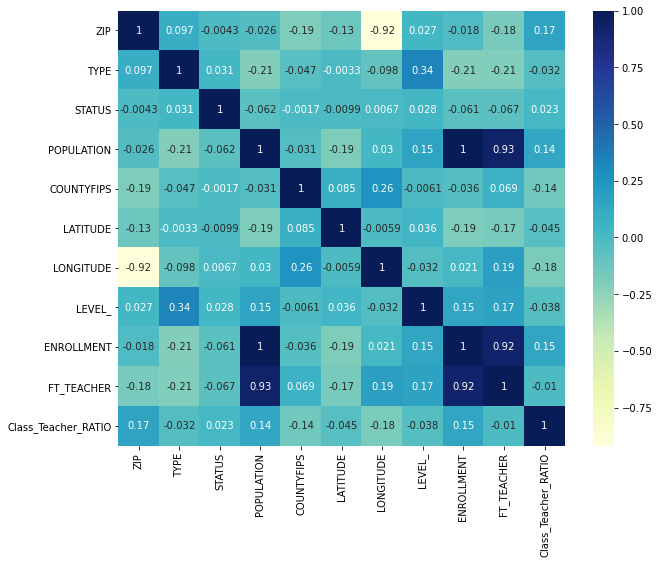

In [26]:
import seaborn as sns
#Visually represent collinearity
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(PS_df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [27]:
#Drop Population, Enrollment, and FT_Teacher columns since they have collinearity and enrollment and FT_teacher included in 
#Class_Teacher_RATIO. Drop Type and Status because couldn't find what the values represent in Kaggle nor education website. 
PS_df.drop(['TYPE', 'STATUS', 'POPULATION', 'ENROLLMENT', 'FT_TEACHER'], axis = 1, inplace = True)

In [28]:
PS_df.head()

,NAME,ADDRESS,CITY,STATE,ZIP,COUNTY,COUNTYFIPS,LATITUDE,LONGITUDE,SOURCEDATE,LEVEL_,Class_Teacher_RATIO
0,SAMSULA ACADEMY,248 N SAMSULA DR,NEW SMYRNA,FL,32168,VOLUSIA,12127,29.022271,-81.050895,2014-02-04 00:00:00+00:00,1,17.076923
1,CAROLINE DORMON JUNIOR HIGH SCHOOL,8906 HWY 165 SOUTH,WOODWORTH,LA,71485,RAPIDES,22079,31.180659,-92.507288,2015-05-08 00:00:00+00:00,1,14.857143
2,HARRIET BEECHER STOWE ELEMENTARY,44 MCKEEN STREET,BRUNSWICK,ME,4011,CUMBERLAND,23005,43.908147,-69.971880,2014-02-04 00:00:00+00:00,1,14.211538
3,LEAKE CENTRAL ELEMENTARY SCHOOL,603 HWY. 16 WEST,CARTHAGE,MS,39051,LEAKE,28079,32.728496,-89.542799,2009-10-13 00:00:00+00:00,1,18.396825
4,KEARNEY ELEM.,902 S JEFFERSON,KEARNEY,MO,64060,CLAY,29047,39.364359,-94.361775,2009-10-13 00:00:00+00:00,1,12.454545


In [29]:
PS_df.shape

(85938, 12)

In [30]:
#Groupby Zipcode and find avg of features per zipcode
PS_df = PS_df.groupby('ZIP', as_index=False)['LEVEL_', 'Class_Teacher_RATIO'].mean()

In [31]:
PS_df.apply(lambda x: len(x.unique()))

ZIP                    20732
LEVEL_                   243
Class_Teacher_RATIO    17328
dtype: int64

In [32]:
PS_df.shape

(20732, 3)

In [33]:
PS_df.head()

,ZIP,LEVEL_,Class_Teacher_RATIO
0,1001,1.50,15.247192
1,1002,1.50,10.940945
2,1005,2.25,13.025238
3,1007,1.80,13.791365
4,1010,1.00,10.777778


In [34]:
##########################
## Target -- Cleaning EA #
##########################
TGT_df.shape

(1829, 47)

In [35]:
TGT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829 entries, 0 to 1828
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   X.locale                             1829 non-null   object 
 1   Address.AddressLine1                 1829 non-null   object 
 2   Address.AddressLine2                 58 non-null     object 
 3   Address.City                         1829 non-null   object 
 4   Address.CountryName                  1829 non-null   object 
 5   Address.County                       1828 non-null   object 
 6   Address.FormattedAddress             1829 non-null   object 
 7   Address.IntersectionDescription      1828 non-null   object 
 8   Address.Latitude                     1829 non-null   float64
 9   Address.Longitude                    1829 non-null   float64
 10  Address.PostalCode                   1829 non-null   object 
 11  Address.Subdivision           

In [36]:
#Select desired variables
TGT_df = TGT_df[['Address.FormattedAddress','Address.AddressLine1','Address.City','Address.CountryName','Address.Latitude','Address.Longitude','Address.County','Address.PostalCode','Address.Subdivision']]

In [37]:
#Analize variable information
TGT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829 entries, 0 to 1828
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Address.FormattedAddress  1829 non-null   object 
 1   Address.AddressLine1      1829 non-null   object 
 2   Address.City              1829 non-null   object 
 3   Address.CountryName       1829 non-null   object 
 4   Address.Latitude          1829 non-null   float64
 5   Address.Longitude         1829 non-null   float64
 6   Address.County            1828 non-null   object 
 7   Address.PostalCode        1829 non-null   object 
 8   Address.Subdivision       1829 non-null   object 
dtypes: float64(2), object(7)
memory usage: 128.7+ KB


In [38]:
# Count the number of nan values in each column
print(TGT_df.isnull().sum())

Address.FormattedAddress    0
Address.AddressLine1        0
Address.City                0
Address.CountryName         0
Address.Latitude            0
Address.Longitude           0
Address.County              1
Address.PostalCode          0
Address.Subdivision         0
dtype: int64


In [39]:
#Change variable names
TGT_df = TGT_df.rename(columns={"Address.FormattedAddress": "FormattedAddress", 
                   "Address.AddressLine1": "AddressLine1",
                   "Address.City": "City",
                   "Address.CountryName": "CountryName",
                   "Address.Latitude": "Latitude",
                   "Address.Longitude": "Longitude",
                   "Address.County": "County",
                   "Address.PostalCode": "PostalCode",
                   "Address.Subdivision": "Subdivision",
                  })

In [40]:
#Drop missing values in column County variable
TGT_df = TGT_df[TGT_df.County.notnull()]

In [41]:
TGT_df.head()

,FormattedAddress,AddressLine1,City,CountryName,Latitude,Longitude,County,PostalCode,Subdivision
0,"400 Oxford Exchange Blvd, Oxford, AL 36203-3459",400 Oxford Exchange Blvd,Oxford,United States,33.608825,-85.783182,Calhoun,36203-3459,AL
1,"2640 Enterprise Dr, Opelika, AL 36801-1511",2640 Enterprise Dr,Opelika,United States,32.618108,-85.410636,Lee,36801-1511,AL
2,"1129 S Park St, Carrollton, GA 30117-4429",1129 S Park St,Carrollton,United States,33.558920,-85.076473,Carroll,30117-4429,GA
3,"555 Bullsboro Dr, Newnan, GA 30265-1045",555 Bullsboro Dr,Newnan,United States,33.392907,-84.758875,Coweta,30265-1045,GA
4,"1591 Bradley Park Dr, Columbus, GA 31904-3071",1591 Bradley Park Dr,Columbus,United States,32.534649,-84.971073,Muscogee,31904-3071,GA


In [42]:
# Count the number of nan values in each column
print(TGT_df.isnull().sum())

FormattedAddress    0
AddressLine1        0
City                0
CountryName         0
Latitude            0
Longitude           0
County              0
PostalCode          0
Subdivision         0
dtype: int64


In [43]:
TGT_df.head()

,FormattedAddress,AddressLine1,City,CountryName,Latitude,Longitude,County,PostalCode,Subdivision
0,"400 Oxford Exchange Blvd, Oxford, AL 36203-3459",400 Oxford Exchange Blvd,Oxford,United States,33.608825,-85.783182,Calhoun,36203-3459,AL
1,"2640 Enterprise Dr, Opelika, AL 36801-1511",2640 Enterprise Dr,Opelika,United States,32.618108,-85.410636,Lee,36801-1511,AL
2,"1129 S Park St, Carrollton, GA 30117-4429",1129 S Park St,Carrollton,United States,33.558920,-85.076473,Carroll,30117-4429,GA
3,"555 Bullsboro Dr, Newnan, GA 30265-1045",555 Bullsboro Dr,Newnan,United States,33.392907,-84.758875,Coweta,30265-1045,GA
4,"1591 Bradley Park Dr, Columbus, GA 31904-3071",1591 Bradley Park Dr,Columbus,United States,32.534649,-84.971073,Muscogee,31904-3071,GA


In [44]:
#Add column that identifies Target at specified address (will groupby zipcode and count the number of targets by zipcode)
TGT_df['Target_count'] = 1
TGT_df = TGT_df.groupby('PostalCode', as_index=False)['Target_count'].count()

In [45]:
#Pull shortened zipcode for Target data
TGT_df['PostalCode'] = [x[:5] for x in TGT_df['PostalCode']]

In [46]:
#Convert values to integers
TGT_df['PostalCode'] = TGT_df.PostalCode.astype(int)

In [47]:
TGT_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1828 entries, 0 to 1827
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   PostalCode    1828 non-null   int32
 1   Target_count  1828 non-null   int64
dtypes: int32(1), int64(1)
memory usage: 35.7 KB


In [48]:
TGT_df.shape

(1828, 2)

In [49]:
#############################
## Starbucks -- Cleaning EA #
#############################
SBUX_df.shape

(25600, 13)

In [50]:
SBUX_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 
 9   Phone Number    18739 non-null  object 
 10  Timezone        25600 non-null  object 
 11  Longitude       25599 non-null  float64
 12  Latitude        25599 non-null  float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB


In [51]:
A_1 = SBUX_df['Brand']
print(A_1.groupby(A_1).count())

Brand
Coffee House Holdings        1
Evolution Fresh              2
Starbucks                25249
Teavana                    348
Name: Brand, dtype: int64


In [52]:
A_2 = SBUX_df['Country']
print(A_2.groupby(A_2).count())

Country
AD        1
AE      144
AR      108
AT       18
AU       22
      ...  
TT        3
TW      394
US    13608
VN       25
ZA        3
Name: Country, Length: 73, dtype: int64


In [53]:
SBUX_df = SBUX_df[SBUX_df["Brand"] == 'Starbucks']

In [54]:
SBUX_df = SBUX_df[SBUX_df["Country"] == 'US']

In [55]:
#Select desired variables
SBUX_df = SBUX_df[['Brand','Street Address','City','State/Province','Country','Postcode','Longitude','Latitude']]

In [56]:
SBUX_df.head()

,Brand,Street Address,City,State/Province,Country,Postcode,Longitude,Latitude
11964,Starbucks,5600 Debarr Rd Ste 9,Anchorage,AK,US,995042300,-149.78,61.21
11965,Starbucks,1725 Abbott Rd,Anchorage,AK,US,995073444,-149.84,61.14
11966,Starbucks,1501 Huffman Rd,Anchorage,AK,US,995153596,-149.85,61.11
11967,Starbucks,"320 W. 100th Ave, 100, Southgate Shopping Ctr ...",Anchorage,AK,US,99515,-149.89,61.13
11968,Starbucks,1005 E Dimond Blvd,Anchorage,AK,US,995152050,-149.86,61.14


In [57]:
# Count the number of nan values in each column
print(SBUX_df.isnull().sum())

Brand             0
Street Address    0
City              0
State/Province    0
Country           0
Postcode          1
Longitude         0
Latitude          0
dtype: int64


In [58]:
#Drop missing values in column County variable
SBUX_df = SBUX_df[SBUX_df.Postcode .notnull()]

In [59]:
# Count the number of nan values in each column
print(SBUX_df.isnull().sum())

Brand             0
Street Address    0
City              0
State/Province    0
Country           0
Postcode          0
Longitude         0
Latitude          0
dtype: int64


In [60]:
SBUX_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13310 entries, 11964 to 25571
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           13310 non-null  object 
 1   Street Address  13310 non-null  object 
 2   City            13310 non-null  object 
 3   State/Province  13310 non-null  object 
 4   Country         13310 non-null  object 
 5   Postcode        13310 non-null  object 
 6   Longitude       13310 non-null  float64
 7   Latitude        13310 non-null  float64
dtypes: float64(2), object(6)
memory usage: 935.9+ KB


In [61]:
#Add column that identifies Starbucks at specified address (will groupby zipcode and count the number of targets by zipcode)
SBUX_df['Starbucks_count'] = 1

In [62]:
SBUX_df.head()

,Brand,Street Address,City,State/Province,Country,Postcode,Longitude,Latitude,Starbucks_count
11964,Starbucks,5600 Debarr Rd Ste 9,Anchorage,AK,US,995042300,-149.78,61.21,1
11965,Starbucks,1725 Abbott Rd,Anchorage,AK,US,995073444,-149.84,61.14,1
11966,Starbucks,1501 Huffman Rd,Anchorage,AK,US,995153596,-149.85,61.11,1
11967,Starbucks,"320 W. 100th Ave, 100, Southgate Shopping Ctr ...",Anchorage,AK,US,99515,-149.89,61.13,1
11968,Starbucks,1005 E Dimond Blvd,Anchorage,AK,US,995152050,-149.86,61.14,1


In [63]:
SBUX_df.shape

(13310, 9)

In [64]:
SBUX_df.apply(lambda x: len(x.unique()))

Brand                  1
Street Address     13194
City                3171
State/Province        51
Country                1
Postcode           12008
Longitude           3330
Latitude            1967
Starbucks_count        1
dtype: int64

In [65]:
#Pull shortened zipcode for Starbucks data
SBUX_df['Postcode'] = [x[:5] for x in SBUX_df['Postcode']]

In [66]:
SBUX_df = SBUX_df.groupby('Postcode', as_index=False)['Starbucks_count'].count()

In [67]:
#Convert values to integers
SBUX_df['Postcode']= SBUX_df.Postcode.astype(int)

In [68]:
SBUX_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5983 entries, 0 to 5982
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Postcode         5983 non-null   int32
 1   Starbucks_count  5983 non-null   int64
dtypes: int32(1), int64(1)
memory usage: 116.9 KB


In [69]:
SBUX_df.shape

(5983, 2)

In [70]:
SBUX_df.head()

,Postcode,Starbucks_count
0,10001,15
1,10002,1
2,10003,10
3,10004,6
4,10005,6


In [71]:
#######################
## Zip -- Cleaning MN #
#######################
zip_df.shape
#Understand range of outputs
zip_df.describe()

,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,MedianListingPricePerSqft_SingleFamilyResidence,MedianListingPrice_1Bedroom,MedianListingPrice_2Bedroom,MedianListingPrice_3Bedroom,MedianListingPrice_4Bedroom,MedianListingPrice_5BedroomOrMore,MedianListingPrice_AllHomes,MedianListingPrice_CondoCoop,MedianListingPrice_DuplexTriplex,MedianListingPrice_SingleFamilyResidence,MedianPctOfPriceReduction_AllHomes,MedianPctOfPriceReduction_CondoCoop,MedianPctOfPriceReduction_SingleFamilyResidence,MedianPriceCutDollar_AllHomes,MedianPriceCutDollar_CondoCoop,MedianPriceCutDollar_SingleFamilyResidence,MedianRentalPricePerSqft_1Bedroom,MedianRentalPricePerSqft_2Bedroom,MedianRentalPricePerSqft_3Bedroom,MedianRentalPricePerSqft_4Bedroom,MedianRentalPricePerSqft_5BedroomOrMore,MedianRentalPricePerSqft_AllHomes,MedianRentalPricePerSqft_CondoCoop,MedianRentalPricePerSqft_DuplexTriplex,MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits,MedianRentalPricePerSqft_SingleFamilyResidence,MedianRentalPricePerSqft_Studio,MedianRentalPrice_1Bedroom,MedianRentalPrice_2Bedroom,MedianRentalPrice_3Bedroom,MedianRentalPrice_4Bedroom,MedianRentalPrice_5BedroomOrMore,MedianRentalPrice_AllHomes,MedianRentalPrice_CondoCoop,MedianRentalPrice_DuplexTriplex,MedianRentalPrice_MultiFamilyResidence5PlusUnits,MedianRentalPrice_SingleFamilyResidence,MedianRentalPrice_Studio,ZHVIPerSqft_AllHomes,PctOfHomesDecreasingInValues_AllHomes,PctOfHomesIncreasingInValues_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_CondoCoop,PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_CondoCoop,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
count,4.383885e+06,1.051104e+06,1.051104e+06,8194.000000,86554.000000,384738.000000,197581.000000,33722.000000,814908.000000,72778.000000,8092.000000,776613.000000,7.753000e+03,6.772400e+04,3.171890e+05,1.616000e+05,2.770300e+04,6.273190e+05,5.564600e+04,1.017100e+04,6.104810e+05,686488.000000,40040.000000,642488.000000,6.864880e+05,40040.000000,6.424880e+05,19600.000000,36378.000000,33054.000000,3814.000000,159.000000,120843.000000,18513.000000,4930.000000,69475.000000,82976.000000,24118.000000,30994.000000,47604.000000,39366.000000,5174.000000,526.000000,114535.000000,21156.000000,14691.000000,89954.000000,80475.000000,27734.000000,3.569675e+06,2.875664e+06,2.875664e+06,895136.000000,74272.000000,844536.000000,895136.000000,74272.000000,844536.000000,1.280862e+06,5.123590e+05,2.333191e+06,3.195020e+06,2.627774e+06,1.313837e+06,3.638221e+06,3.073015e+06,1.296485e+06,3.631566e+06,3.612063e+06,3.684376e+06,1.337362e+06,1.339353e+06,1.253969e+06,723542.000000,1.334321e+06
mean,4.683726e+04,1.230490e+02,1.230721e+02,322.914946,188.769142,144.331279,154.549637,223.571617,158.755338,273.766816,228.069518,150.567647,2.630217e+05,2.388086e+05,2.470818e+05,3.937908e+05,8.394086e+05,2.785605e+05,3.102841e+05,4.966216e+05,2.896942e+05,4.213423,4.501746,4.195601,9.834591e+03,12069.728272,1.013018e+04,2.334064,1.698105,1.055774,1.078680,4.719254,1.207743,2.136242,2.697142,1.719023,1.019034,1.353846,1704.562173,1819.981388,1781.532744,2549.728740,4412.232890,1635.881429,2064.212257,2092.248349,1556.011133,1571.055092,1529.596290,1.246145e+02,3.466598e+01,5.795258e+01,12.938144,11.275611,13

In [72]:
## Understand the number of nulls
zip_df.isnull().sum()

RegionName                                    0
InventorySeasonallyAdjusted_AllHomes    3332781
InventoryRaw_AllHomes                   3332781
MedianListingPricePerSqft_1Bedroom      4375691
MedianListingPricePerSqft_2Bedroom      4297331
                                         ...   
ZRI_AllHomes                            3046523
ZRI_AllHomesPlusMultifamily             3044532
ZriPerSqft_AllHomes                     3129916
Zri_MultiFamilyResidenceRental          3660343
Zri_SingleFamilyResidenceRental         3049564
Length: 75, dtype: int64

In [73]:
## Establish date range to 2017 for normalization
zip_df = zip_df.loc['2010-01-01':'2017-12-31']

In [74]:
## Drop index variable
zip_df.reset_index(drop=True, inplace=True)

In [75]:
## Create variable named multi that utilizes the groupby function to reduce to a singular of zip code then
##  aggregate the reamining columns in an effort to reduce overall complexity 
zip_multi = zip_df.groupby(['RegionName']).agg({'InventorySeasonallyAdjusted_AllHomes':['mean'], 
                                                'InventoryRaw_AllHomes':['mean'],
                                                'MedianListingPricePerSqft_1Bedroom':['mean'],
                                                'MedianListingPricePerSqft_2Bedroom':['mean'],
                                                'MedianListingPricePerSqft_3Bedroom':['mean'],
                                                'MedianListingPricePerSqft_4Bedroom':['mean'],
                                                'MedianListingPricePerSqft_5BedroomOrMore':['mean'],
                                                'MedianListingPricePerSqft_AllHomes':['mean'],
                                                'MedianListingPricePerSqft_CondoCoop':['mean'],
                                                'MedianListingPricePerSqft_DuplexTriplex':['mean'],
                                                'MedianListingPricePerSqft_SingleFamilyResidence':['mean'],
                                                'MedianListingPricePerSqft_SingleFamilyResidence':['mean'],
                                                'MedianListingPrice_1Bedroom':['mean'],
                                                'MedianListingPrice_2Bedroom':['mean'],
                                                'MedianListingPrice_3Bedroom':['mean'],
                                                'MedianListingPrice_4Bedroom':['mean'],
                                                'MedianListingPrice_5BedroomOrMore':['mean'],
                                                'MedianListingPrice_AllHomes':['mean'],
                                                'MedianListingPrice_CondoCoop':['mean'],
                                                'MedianListingPrice_DuplexTriplex':['mean'],
                                                'MedianListingPrice_SingleFamilyResidence':['mean'],
                                                'MedianPctOfPriceReduction_AllHomes':['mean'],
                                                'MedianPctOfPriceReduction_CondoCoop':['mean'],
                                                'MedianPctOfPriceReduction_SingleFamilyResidence':['mean'],
                                                'MedianPriceCutDollar_AllHomes':['mean'],
                                                'MedianPriceCutDollar_CondoCoop':['mean'],
                                                'MedianPriceCutDollar_SingleFamilyResidence':['mean'],
                                                'MedianRentalPricePerSqft_1Bedroom':['mean'],
                                                'MedianRentalPricePerSqft_2Bedroom':['mean'],
                                                'MedianRentalPricePerSqft_3Bedroom':['mean'],
                                                'MedianRentalPricePerSqft_4Bedroom':['mean'],
                                                'MedianRentalPricePerSqft_5BedroomOrMore':['mean'],
                                                'MedianRentalPricePerSqft_AllHomes':['mean'],
                                                'MedianRentalPricePerSqft_CondoCoop':['mean'],
                                                'MedianRentalPricePerSqft_DuplexTriplex':['mean'],
                                                'MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits':['mean'],
                                                'MedianRentalPricePerSqft_SingleFamilyResidence':['mean'],
                                                'MedianRentalPricePerSqft_Studio':['mean'],
                                                'MedianRentalPrice_1Bedroom':['mean'],
                                                'MedianRentalPrice_2Bedroom':['mean'],
                                                'MedianRentalPrice_3Bedroom':['mean'],
                                                'MedianRentalPrice_4Bedroom':['mean'],
                                                'MedianRentalPrice_5BedroomOrMore':['mean'],
                                                'MedianRentalPrice_AllHomes':['mean'],
                                                'MedianRentalPrice_CondoCoop':['mean'],
                                                'MedianRentalPrice_DuplexTriplex':['mean'],
                                                'MedianRentalPrice_MultiFamilyResidence5PlusUnits':['mean'],
                                                'MedianRentalPrice_SingleFamilyResidence':['mean'],
                                                'MedianRentalPrice_Studio':['mean'],
                                                'PctOfHomesDecreasingInValues_AllHomes':['mean'],
                                                'PctOfHomesIncreasingInValues_AllHomes':['mean'],
                                                'PctOfListingsWithPriceReductionsSeasAdj_AllHomes':['mean'],
                                                'PctOfListingsWithPriceReductionsSeasAdj_CondoCoop':['mean'],
                                                'PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence':['mean'],
                                                'PctOfListingsWithPriceReductions_AllHomes':['mean'],
                                                'PctOfListingsWithPriceReductions_CondoCoop':['mean'],
                                                'PctOfListingsWithPriceReductions_SingleFamilyResidence':['mean'],
                                                'PriceToRentRatio_AllHomes':['mean'],
                                                'ZHVI_1bedroom':['mean'],
                                                'ZHVI_2bedroom':['mean'],
                                                'ZHVI_3bedroom':['mean'],
                                                'ZHVI_4bedroom':['mean'],
                                                'ZHVI_5BedroomOrMore':['mean'],
                                                'ZHVI_AllHomes':['mean'],
                                                'ZHVI_BottomTier':['mean'],
                                                'ZHVI_CondoCoop':['mean'],
                                                'ZHVI_MiddleTier':['mean'],
                                                'ZHVI_SingleFamilyResidence':['mean'],
                                                'ZHVI_TopTier':['mean'],
                                                'ZRI_AllHomes':['mean'],
                                                'ZRI_AllHomesPlusMultifamily':['mean'],
                                                'ZriPerSqft_AllHomes':['mean'],
                                                'Zri_MultiFamilyResidenceRental':['mean'],
                                                'Zri_SingleFamilyResidenceRental':['mean'],                                               
                                               }).reset_index()
zip_multi.reset_index()

,index,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,MedianListingPricePerSqft_SingleFamilyResidence,MedianListingPrice_1Bedroom,MedianListingPrice_2Bedroom,MedianListingPrice_3Bedroom,MedianListingPrice_4Bedroom,MedianListingPrice_5BedroomOrMore,MedianListingPrice_AllHomes,MedianListingPrice_CondoCoop,MedianListingPrice_DuplexTriplex,MedianListingPrice_SingleFamilyResidence,MedianPctOfPriceReduction_AllHomes,MedianPctOfPriceReduction_CondoCoop,MedianPctOfPriceReduction_SingleFamilyResidence,MedianPriceCutDollar_AllHomes,MedianPriceCutDollar_CondoCoop,MedianPriceCutDollar_SingleFamilyResidence,MedianRentalPricePerSqft_1Bedroom,MedianRentalPricePerSqft_2Bedroom,MedianRentalPricePerSqft_3Bedroom,MedianRentalPricePerSqft_4Bedroom,MedianRentalPricePerSqft_5BedroomOrMore,MedianRentalPricePerSqft_AllHomes,MedianRentalPricePerSqft_CondoCoop,MedianRentalPricePerSqft_DuplexTriplex,MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits,MedianRentalPricePerSqft_SingleFamilyResidence,MedianRentalPricePerSqft_Studio,MedianRentalPrice_1Bedroom,MedianRentalPrice_2Bedroom,MedianRentalPrice_3Bedroom,MedianRentalPrice_4Bedroom,MedianRentalPrice_5BedroomOrMore,MedianRentalPrice_AllHomes,MedianRentalPrice_CondoCoop,MedianRentalPrice_DuplexTriplex,MedianRentalPrice_MultiFamilyResidence5PlusUnits,MedianRentalPrice_SingleFamilyResidence,MedianRentalPrice_Studio,PctOfHomesDecreasingInValues_AllHomes,PctOfHomesIncreasingInValues_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_CondoCoop,PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_CondoCoop,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
,,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.240419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1001,78.135417,78.187500,NaN,140.826375,NaN,NaN,NaN,143.969963,NaN,NaN,152.344176,NaN,168329.6875,NaN,NaN,NaN,189913.338542,NaN,NaN,210968.369792,3.029398,NaN,2.993525,5736.511364,NaN,6881.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.043646,44.001250,17.751160,NaN,18.945096,17.769963,NaN,18.981072,10.630345,65748.958333,155172.916667,195243.750000,216195.833333,252576.041667,181509.375000,135272.916667,134261.458333,181509.375000,194297.916667,240321.875000,1450.686047,1441.837209,1.142535,1287.418605,1500.930233
2,2,1002,129.979167,129.979167,NaN,NaN,NaN,NaN,NaN,194.249250,NaN,NaN,196.557306,NaN,NaN,NaN,NaN,NaN,315550.781250,NaN,NaN,366685.416667,3.302529,NaN,3.480619,10297.727273,NaN,11815.340909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.175833,45.775833,13.034648,NaN,14.577852,12.990573,NaN,14.523412,13.200000,138125.000000

In [76]:
zip_multi.columns = zip_multi.columns.droplevel(1) 

In [77]:
zip_multi.columns

Index(['RegionName', 'InventorySeasonallyAdjusted_AllHomes', 'InventoryRaw_AllHomes', 'MedianListingPricePerSqft_1Bedroom', 'MedianListingPricePerSqft_2Bedroom', 'MedianListingPricePerSqft_3Bedroom', 'MedianListingPricePerSqft_4Bedroom', 'MedianListingPricePerSqft_5BedroomOrMore', 'MedianListingPricePerSqft_AllHomes', 'MedianListingPricePerSqft_CondoCoop', 'MedianListingPricePerSqft_DuplexTriplex', 'MedianListingPricePerSqft_SingleFamilyResidence', 'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom', 'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom', 'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes', 'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex', 'MedianListingPrice_SingleFamilyResidence', 'MedianPctOfPriceReduction_AllHomes', 'MedianPctOfPriceReduction_CondoCoop', 'MedianPctOfPriceReduction_SingleFamilyResidence', 'MedianPriceCutDollar_AllHomes', 'MedianPriceCutDollar_CondoCoop', 'MedianPriceCutDollar_SingleFamilyResidence',
  

In [78]:
## Establish two new columns in order to test logic of replacement / consolidation
zip_df['NumberOfBedrooms'] = 0
zip_df['DwellingType'] = 0
zip_df['ZHVIPricing'] = 0


In [79]:
## Replace null with 0

zip_df['ZHVI_1bedroom'] = zip_df['ZHVI_1bedroom'].fillna(0)
zip_df['ZHVI_2bedroom'] = zip_df['ZHVI_2bedroom'].fillna(0)
zip_df['ZHVI_3bedroom'] = zip_df['ZHVI_3bedroom'].fillna(0)
zip_df['ZHVI_4bedroom'] = zip_df['ZHVI_4bedroom'].fillna(0)
zip_df['ZHVI_5BedroomOrMore'] = zip_df['ZHVI_5BedroomOrMore'].fillna(0)
zip_df['ZHVI_CondoCoop'] = zip_df['ZHVI_CondoCoop'].fillna(0)
zip_df['ZHVI_SingleFamilyResidence'] = zip_df['ZHVI_SingleFamilyResidence'].fillna(0)


In [80]:
zip_df.shape

(1802607, 78)

In [81]:
z1 = zip_df
z2 = zip_df

In [82]:
z1 = z1[[
        'RegionName'
        , 'ZHVI_1bedroom'
        , 'ZHVI_2bedroom'
        , 'ZHVI_3bedroom'
        , 'ZHVI_4bedroom'
        , 'ZHVI_5BedroomOrMore'
]]

z2 = z2[[ 'RegionName'
        , 'ZHVI_CondoCoop'
        , 'ZHVI_SingleFamilyResidence'
]]

In [83]:
## Utilize melt to pivot the data
z1 = z1.melt(id_vars=['RegionName'])
z2 = z2.melt(id_vars=['RegionName'])

In [84]:
## Need to rename columns after melt  to properly identify
z1.rename(columns = {'variable': 'NumberOfBedrooms'}, inplace=True)
z1.rename(columns = {'value': 'ZVHIPricing'}, inplace=True)
z2.rename(columns = {'variable': 'DwellingType'}, inplace=True)
z2.rename(columns = {'value': 'DwellingPricing'}, inplace=True)

In [85]:
z1 = z1[(z1['ZVHIPricing'] !=0)]
z2 = z2[(z2['DwellingPricing'] !=0)]
print(z1.shape)
print(z2.shape)

(4013202, 3)
(1983020, 3)


In [86]:
## Factorize the dwelling
# ## Ensure weight is given to the size
No = {'ZHVI_1bedroom':1,
              'ZHVI_2bedroom':2,
              'ZHVI_3bedroom':3,
              'ZHVI_4bedroom':4,
              'ZHVI_5BedroomOrMore':5}

No2 = {'ZHVI_CondoCoop':1,
              'ZHVI_SingleFamilyResidence':2,
      }

z1['NumberOfBedrooms'] = z1['NumberOfBedrooms'].map(No)
z2['DwellingType'] = z2['DwellingType'].map(No2)

In [87]:
## Aggregate pricing values by region name and subset
z1 = z1.groupby(['RegionName','NumberOfBedrooms']).agg({'ZVHIPricing':['mean']}).reset_index(level=[1,0])
z2 = z2.groupby(['RegionName','DwellingType']).agg({'DwellingPricing':['mean']}).reset_index(level=[1,0])


In [88]:
print(z1.shape)
print(z2.shape)

(42355, 3)
(20983, 3)


In [89]:
## merge z1 and z2 on the region name for a consolidated dataset
#zipy = pd.concat([z1,z2],join='outer',keys='RegionName')
zz = z1.merge(z2,how='left',on='RegionName')

In [90]:
zz.reset_index()

,index,RegionName,NumberOfBedrooms,ZVHIPricing,DwellingType,DwellingPricing
,,,,mean,,mean
0,0,1001,1,65748.958333,1.0,134261.458333
1,1,1001,1,65748.958333,2.0,194297.916667
2,2,1001,2,155172.916667,1.0,134261.458333
3,3,1001,2,155172.916667,2.0,194297.916667
4,4,1001,3,195243.750000,1.0,134261.458333
...,...,...,...,...,...,...
62515,62515,99901,2,163360.416667,2.0,242763.541667
62516,62516,99901,3,239814.583333,1.0,119436.458333
62517,62517,99901,3,239814.583333,2.0,242763.541667


In [91]:
zz.columns

MultiIndex([(      'RegionName',     ''),
            ('NumberOfBedrooms',     ''),
            (     'ZVHIPricing', 'mean'),
            (    'DwellingType',     ''),
            ( 'DwellingPricing', 'mean')],
           )

In [92]:
## Create a price delta column and a price column 

##

zz['Dw'] = zz['DwellingPricing']
zz['zv'] = zz['ZVHIPricing']
zz['Delta'] = (zz['Dw'] - zz['zv'])
zz['Pricing'] = zz['zv'] + zz['Delta']


In [93]:
## Replace variable name
zip_df = zz[[
    'RegionName'
    ,'NumberOfBedrooms'
    ,'DwellingType'
    ,'Pricing'
]]

In [94]:
## Rename column to fall in line with other code for joining
zip_df.rename(columns = {'RegionName': 'ZIP'}, inplace=True)
#zip_multi.rename(columns = {'RegionName': 'ZIP'}, inplace=True)

In [95]:
zip_df.head()

,ZIP,NumberOfBedrooms,DwellingType,Pricing
,,,,
0,1001,1,1.0,134261.458333
1,1001,1,2.0,194297.916667
2,1001,2,1.0,134261.458333
3,1001,2,2.0,194297.916667
4,1001,3,1.0,134261.458333


In [96]:
zip_df.shape

(62520, 4)

In [97]:
zip_df.columns = zip_df.columns.droplevel(1) 

In [98]:
zip_df.columns

Index(['ZIP', 'NumberOfBedrooms', 'DwellingType', 'Pricing'], dtype='object')

In [99]:
type(zip_df)

pandas.core.frame.DataFrame

In [100]:
#########################################
## Hospital Quality Care -- Cleaning SL #
#########################################
hospital_df = pd.read_csv('Hospital General Information.csv', encoding="ISO-8859-1")

hospital_df.shape

(4812, 28)

In [101]:
hospital_df=hospital_df.rename(columns={"ZIP Code": "Zipcode"})
hospital_df=hospital_df[hospital_df['Hospital overall rating']!='Not Available']

In [102]:
hospital_df.head()

,Provider ID,Hospital Name,Address,City,State,Zipcode,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,2,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,Yes,Y,3,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...


In [103]:
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3567 entries, 0 to 4809
Data columns (total 28 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Provider ID                                                    3567 non-null   int64 
 1   Hospital Name                                                  3567 non-null   object
 2   Address                                                        3567 non-null   object
 3   City                                                           3567 non-null   object
 4   State                                                          3567 non-null   object
 5   Zipcode                                                        3567 non-null   int64 
 6   County Name                                                    3563 non-null   object
 7   Phone Number                                                   3567 n

In [104]:
# clean Hospital overall rating, convert to numeric
hospital_df['Hospital overall rating'] =pd.to_numeric(hospital_df['Hospital overall rating'], errors='coerce')

In [105]:
null_df = hospital_df.isnull().sum(axis = 0).sort_values().to_frame('missing_value')
null_df[null_df['missing_value'] > 0].reset_index()

,index,missing_value
0,County Name,4
1,Meets criteria for meaningful use of EHRs,21
2,Safety of care national comparison footnote,2635
3,Efficient use of medical imaging national comp...,2739
4,Patient experience national comparison footnote,3288
5,Timeliness of care national comparison footnote,3315
6,Mortality national comparison footnote,3333
7,Effectiveness of care national comparison foot...,3360
8,Hospital overall rating footnote,3414
9,Readmission national comparison footnote,3505


In [106]:
# drop provider id, hospital name, address, phone number since they are all irrelevant 
# also drop all footnote since they are all incorporate in the other columns.
drop_these = ['Provider ID', 'Hospital Name', 'Phone Number']
drop_these.extend([col for col in hospital_df if 'footnote' in col])
hospital_df = hospital_df.drop(columns = drop_these)

# hospital_df.loc[:,hospital_df.columns.str.endswith('footnote')]

In [107]:
# drop provider id, hospital name, address, phone number since they are all irrelevant 
# also drop all footnote since they are all incorporate in the other columns.
drop_these = ['County Name','Address','City','State']
drop_these.extend([col for col in hospital_df if 'footnote' in col])
hospital_df = hospital_df.drop(columns = drop_these)

# hospital_df.loc[:,hospital_df.columns.str.endswith('footnote')]

In [108]:
hospital_df.head()

,Zipcode,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
0,36301,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,Same as the national average,Above the national average,Same as the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average
1,35957,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,Below the national average,Same as the national average,Above the national average,Same as the national average,Same as the national average,Above the national average,Below the national average
2,35631,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,Below the national average,Same as the national average,Same as the national average,Below the national average,Same as the national average,Above the national average,Same as the national average
3,36467,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,2,Same as the national average,Not Available,Below the national average,Same as the national average,Below the national average,Above the national average,Not Available
4,36049,Acute Care Hospitals,Proprietary,Yes,Y,3,Same as the national average,Not Available,Same as the national average,Not Available,Same as the national average,Above the national average,Not Available


In [109]:
# find missing value, and clean missing value
null_df = hospital_df.isnull().sum(axis = 0).sort_values().to_frame('missing_value')
null_df[null_df['missing_value'] > 0].reset_index()

,index,missing_value
0,Meets criteria for meaningful use of EHRs,21


In [110]:
hospital_df['Meets criteria for meaningful use of EHRs'].value_counts()

Y    3546
Name: Meets criteria for meaningful use of EHRs, dtype: int64

In [111]:
hospital_df['Meets criteria for meaningful use of EHRs'] = hospital_df['Meets criteria for meaningful use of EHRs'].fillna('Not Available')

In [112]:
hospital_df['Hospital Ownership'].value_counts()

Voluntary non-profit - Private                 1605
Proprietary                                     617
Voluntary non-profit - Other                    373
Government - Hospital District or Authority     337
Voluntary non-profit - Church                   309
Government - Local                              243
Government - State                               45
Physician                                        20
Government - Federal                             16
Tribal                                            2
Name: Hospital Ownership, dtype: int64

In [113]:
hospital_df['Hospital Ownership'] = hospital_df['Hospital Ownership'].replace({
                    'Voluntary non-profit - Private': 'non-profit', 
                    'Proprietary':'for-profit', 
                    'Government - Hospital District or Authority': 'government',
                    'Voluntary non-profit - Other':'non-profit',
                    'Government - Local':'government',
                    'Voluntary non-profit - Church':'non-profit',
                    'Physician':'for-profit',
                    'Government - State':'government',
                    'Tribal ':'government',
                    'Government - Federal':'government',
                                  })

In [114]:
# clean hostipal ownership
hospital_df['Hospital Type'].value_counts()

Acute Care Hospitals         2971
Critical Access Hospitals     596
Name: Hospital Type, dtype: int64

There are four level in the following 7 aspect: 
Mortality national comparison; 
Safety of care national comparison;
Safety of care national comparison;
Readmission national comparison	Patient experience national comparison	Effectiveness of care national comparison	Timeliness of care national comparison	Efficient use of medical imaging national comparison
-1 Below the national average
0Same as the national average                    
1Above the national average       
Not Available   

In [115]:
# there are four level in the following 7 aspect
#Same as the national average    
#Not Available                   
#Above the national average       
#Below the national average
hospital_df['Mortality national comparison'].value_counts()

Same as the national average    2592
Above the national average       400
Below the national average       341
Not Available                    234
Name: Mortality national comparison, dtype: int64

In [116]:
# drop 'Mortality national comparison', 'Safety of care national comparison','Readmission national comparison',
# 'Patient experience national comparison', 'Effectiveness of care national comparison',
# 'Timeliness of care national comparison','Efficient use of medical imaging national comparison'
# since they are Incorporate in the overall rating
drop_these = ['Mortality national comparison', 'Safety of care national comparison','Readmission national comparison',
'Patient experience national comparison', 'Effectiveness of care national comparison',
'Timeliness of care national comparison','Efficient use of medical imaging national comparison']
hospital_df = hospital_df.drop(columns = drop_these)


In [117]:
cols_categorical = hospital_df.columns.difference(hospital_df._get_numeric_data().columns)
categorical = hospital_df[cols_categorical]
cols_categorical
#categorical_dummy = pd.get_dummies(categorical,columns = cols_categorical)

Index(['Emergency Services', 'Hospital Ownership', 'Hospital Type', 'Meets criteria for meaningful use of EHRs'], dtype='object')

In [118]:
numeric = hospital_df._get_numeric_data()
numeric.head()

,Zipcode,Hospital overall rating
0,36301,3
1,35957,3
2,35631,2
3,36467,2
4,36049,3


In [119]:
categorical_dummy = pd.get_dummies(hospital_df,columns = cols_categorical).drop(columns=['Zipcode','Hospital overall rating'])

In [120]:
hospital_df = pd.concat([numeric,categorical_dummy],axis = 1)
hospital_df.head()

,Zipcode,Hospital overall rating,Emergency Services_No,Emergency Services_Yes,Hospital Ownership_Tribal,Hospital Ownership_for-profit,Hospital Ownership_government,Hospital Ownership_non-profit,Hospital Type_Acute Care Hospitals,Hospital Type_Critical Access Hospitals,Meets criteria for meaningful use of EHRs_Not Available,Meets criteria for meaningful use of EHRs_Y
0,36301,3,0,1,0,0,1,0,1,0,0,1
1,35957,3,0,1,0,0,1,0,1,0,0,1
2,35631,2,0,1,0,0,1,0,1,0,0,1
3,36467,2,0,1,0,0,0,1,1,0,0,1
4,36049,3,0,1,0,1,0,0,1,0,0,1


In [121]:
#Groupby Zipcode and find the average of features
hospital_df.groupby('Zipcode', as_index=False)['Hospital overall rating'].mean()

,Zipcode,Hospital overall rating
0,674,2.0
1,683,2.0
2,717,2.0
3,725,2.0
4,733,2.0
...,...,...
3364,99645,3.0
3365,99669,3.0
3366,99701,3.0
3367,99801,3.0


In [122]:
hospital_df = hospital_df.groupby('Zipcode', as_index=False).mean()
hospital_df.head()

,Zipcode,Hospital overall rating,Emergency Services_No,Emergency Services_Yes,Hospital Ownership_Tribal,Hospital Ownership_for-profit,Hospital Ownership_government,Hospital Ownership_non-profit,Hospital Type_Acute Care Hospitals,Hospital Type_Critical Access Hospitals,Meets criteria for meaningful use of EHRs_Not Available,Meets criteria for meaningful use of EHRs_Y
0,674,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,683,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,717,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,725,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,733,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [123]:

hospital_df.drop(['Emergency Services_No', 'Hospital Ownership_Tribal', 'Hospital Ownership_for-profit', 
                  'Hospital Ownership_government', 'Hospital Ownership_non-profit', 
                  'Hospital Type_Acute Care Hospitals', 'Hospital Type_Critical Access Hospitals', 
                  'Meets criteria for meaningful use of EHRs_Not Available',
                  'Meets criteria for meaningful use of EHRs_Y'], axis = 1, inplace = True)

In [124]:
hospital_df.to_csv('hostipal_clean.csv')

### Consolidation
https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

In [125]:
#### Consolidate dataframes for ease of use
#pd.concat()
PS_df.shape

(20732, 3)

In [126]:
food_df.head()

,Zipcode,Urban,OHU2010,LowIncomeTracts,MedianFamilyIncome,LA1and10
0,1001.0,1.000000,2098.000000,0.200000,73672.800000,1.000000
1,1002.0,0.777778,1298.666667,0.666667,76141.333333,0.666667
2,1005.0,0.000000,2025.000000,0.000000,80846.000000,0.000000
3,1007.0,0.000000,2797.500000,0.000000,93071.000000,0.000000
4,1008.0,0.000000,2826.000000,0.000000,79719.000000,1.000000


In [127]:
#Rename Column
food_df.rename(columns = {'Zipcode': 'ZIP'}, inplace=True)

In [128]:
#Left Join food to PS data (want to make sure keep as much data as possible)
PS_food_df = PS_df.merge(food_df, on="ZIP", how="left") 
PS_food_df.head()

,ZIP,LEVEL_,Class_Teacher_RATIO,Urban,OHU2010,LowIncomeTracts,MedianFamilyIncome,LA1and10
0,1001,1.50,15.247192,1.000000,2098.000000,0.200000,73672.800000,1.000000
1,1002,1.50,10.940945,0.777778,1298.666667,0.666667,76141.333333,0.666667
2,1005,2.25,13.025238,0.000000,2025.000000,0.000000,80846.000000,0.000000
3,1007,1.80,13.791365,0.000000,2797.500000,0.000000,93071.000000,0.000000
4,1010,1.00,10.777778,0.000000,1429.000000,0.000000,115927.000000,0.000000


In [129]:
PS_food_df.shape

(20732, 8)

In [130]:
TGT_df.shape

(1828, 2)

In [131]:
SBUX_df.shape

(5983, 2)

In [132]:
#Rename SBUX and TGT columns
SBUX_df.rename(columns = {'Postcode': 'ZIP'}, inplace=True)
TGT_df.rename(columns = {'PostalCode': 'ZIP'}, inplace=True)

In [133]:
#Left Join TGT to SBUX
SBUX_TGT_df = SBUX_df.merge(TGT_df, on="ZIP", how="left")
SBUX_TGT_df.head()

,ZIP,Starbucks_count,Target_count
0,10001,15,NaN
1,10002,1,NaN
2,10003,10,NaN
3,10004,6,NaN
4,10005,6,NaN


In [134]:
SBUX_TGT_df.shape

(6035, 3)

In [135]:
features_df = PS_food_df.merge(SBUX_TGT_df, on="ZIP", how="left")
features_df.head()

,ZIP,LEVEL_,Class_Teacher_RATIO,Urban,OHU2010,LowIncomeTracts,MedianFamilyIncome,LA1and10,Starbucks_count,Target_count
0,1001,1.50,15.247192,1.000000,2098.000000,0.200000,73672.800000,1.000000,NaN,NaN
1,1002,1.50,10.940945,0.777778,1298.666667,0.666667,76141.333333,0.666667,NaN,NaN
2,1005,2.25,13.025238,0.000000,2025.000000,0.000000,80846.000000,0.000000,NaN,NaN
3,1007,1.80,13.791365,0.000000,2797.500000,0.000000,93071.000000,0.000000,NaN,NaN
4,1010,1.00,10.777778,0.000000,1429.000000,0.000000,115927.000000,0.000000,NaN,NaN


In [136]:
features_df.shape

(20781, 10)

In [137]:
features_df.apply(lambda x: sum(x.isnull()))

ZIP                        0
LEVEL_                     0
Class_Teacher_RATIO        0
Urban                   7153
OHU2010                 7153
LowIncomeTracts         7153
MedianFamilyIncome      7153
LA1and10                7153
Starbucks_count        15730
Target_count           19215
dtype: int64

In [138]:
#Fill NA's with 0 for Starbucks and Target because those zipcodes don't have locations. 
features_df[['Starbucks_count', 'Target_count']] = features_df[['Starbucks_count', 'Target_count']].fillna(value=0)

In [139]:
features_df.apply(lambda x: sum(x.isnull()))

ZIP                       0
LEVEL_                    0
Class_Teacher_RATIO       0
Urban                  7153
OHU2010                7153
LowIncomeTracts        7153
MedianFamilyIncome     7153
LA1and10               7153
Starbucks_count           0
Target_count              0
dtype: int64

In [140]:
#Rename hospital columns
hospital_df = pd.read_csv('hostipal_clean.csv')
hospital_df.rename(columns = {'Zipcode': 'ZIP'}, inplace=True)

In [141]:
hospital_df.shape

(3369, 4)

In [142]:
#Left Join hospital to features_df
features_df = features_df.merge(hospital_df, on="ZIP", how="left")
features_df.head()

,ZIP,LEVEL_,Class_Teacher_RATIO,Urban,OHU2010,LowIncomeTracts,MedianFamilyIncome,LA1and10,Starbucks_count,Target_count,Unnamed: 0,Hospital overall rating,Emergency Services_Yes
0,1001,1.50,15.247192,1.000000,2098.000000,0.200000,73672.800000,1.000000,0.0,0.0,NaN,NaN,NaN
1,1002,1.50,10.940945,0.777778,1298.666667,0.666667,76141.333333,0.666667,0.0,0.0,NaN,NaN,NaN
2,1005,2.25,13.025238,0.000000,2025.000000,0.000000,80846.000000,0.000000,0.0,0.0,NaN,NaN,NaN
3,1007,1.80,13.791365,0.000000,2797.500000,0.000000,93071.000000,0.000000,0.0,0.0,NaN,NaN,NaN
4,1010,1.00,10.777778,0.000000,1429.000000,0.000000,115927.000000,0.000000,0.0,0.0,NaN,NaN,NaN


In [143]:
pd.set_option('display.max_rows', 30)
features_df.apply(lambda x: sum(x.isnull()))

ZIP                            0
LEVEL_                         0
Class_Teacher_RATIO            0
Urban                       7153
OHU2010                     7153
LowIncomeTracts             7153
MedianFamilyIncome          7153
LA1and10                    7153
Starbucks_count                0
Target_count                   0
Unnamed: 0                 17863
Hospital overall rating    17863
Emergency Services_Yes     17863
dtype: int64

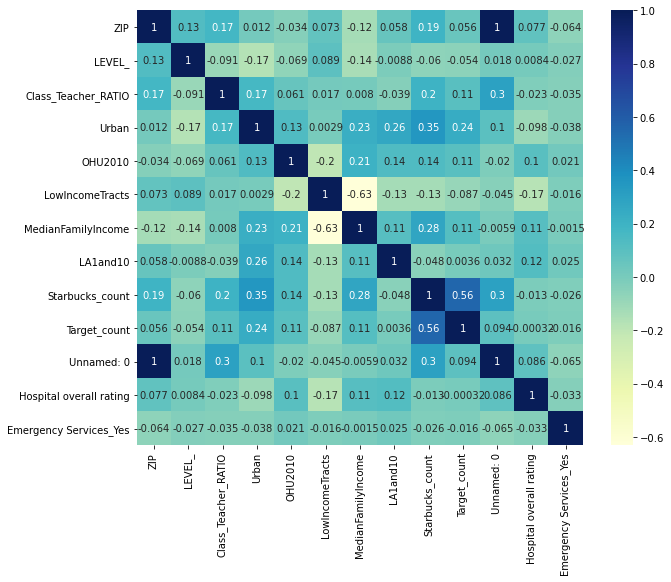

In [144]:
#Visually represent collinearity
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(features_df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [145]:
type(features_df)

pandas.core.frame.DataFrame

In [146]:
zip_df.head()

,ZIP,NumberOfBedrooms,DwellingType,Pricing
0,1001,1,1.0,134261.458333
1,1001,1,2.0,194297.916667
2,1001,2,1.0,134261.458333
3,1001,2,2.0,194297.916667
4,1001,3,1.0,134261.458333


In [147]:
features_df.head()

,ZIP,LEVEL_,Class_Teacher_RATIO,Urban,OHU2010,LowIncomeTracts,MedianFamilyIncome,LA1and10,Starbucks_count,Target_count,Unnamed: 0,Hospital overall rating,Emergency Services_Yes
0,1001,1.50,15.247192,1.000000,2098.000000,0.200000,73672.800000,1.000000,0.0,0.0,NaN,NaN,NaN
1,1002,1.50,10.940945,0.777778,1298.666667,0.666667,76141.333333,0.666667,0.0,0.0,NaN,NaN,NaN
2,1005,2.25,13.025238,0.000000,2025.000000,0.000000,80846.000000,0.000000,0.0,0.0,NaN,NaN,NaN
3,1007,1.80,13.791365,0.000000,2797.500000,0.000000,93071.000000,0.000000,0.0,0.0,NaN,NaN,NaN
4,1010,1.00,10.777778,0.000000,1429.000000,0.000000,115927.000000,0.000000,0.0,0.0,NaN,NaN,NaN


In [148]:
#Left Join features_df to primary Zillow dataset
df = zip_df.merge(features_df, on="ZIP", how="left")
#df = df.drop(df.columns[1], axis=1)
df.head()

,ZIP,NumberOfBedrooms,DwellingType,Pricing,LEVEL_,Class_Teacher_RATIO,Urban,OHU2010,LowIncomeTracts,MedianFamilyIncome,LA1and10,Starbucks_count,Target_count,Unnamed: 0,Hospital overall rating,Emergency Services_Yes
0,1001,1,1.0,134261.458333,1.5,15.247192,1.0,2098.0,0.2,73672.8,1.0,0.0,0.0,NaN,NaN,NaN
1,1001,1,2.0,194297.916667,1.5,15.247192,1.0,2098.0,0.2,73672.8,1.0,0.0,0.0,NaN,NaN,NaN
2,1001,2,1.0,134261.458333,1.5,15.247192,1.0,2098.0,0.2,73672.8,1.0,0.0,0.0,NaN,NaN,NaN
3,1001,2,2.0,194297.916667,1.5,15.247192,1.0,2098.0,0.2,73672.8,1.0,0.0,0.0,NaN,NaN,NaN
4,1001,3,1.0,134261.458333,1.5,15.247192,1.0,2098.0,0.2,73672.8,1.0,0.0,0.0,NaN,NaN,NaN


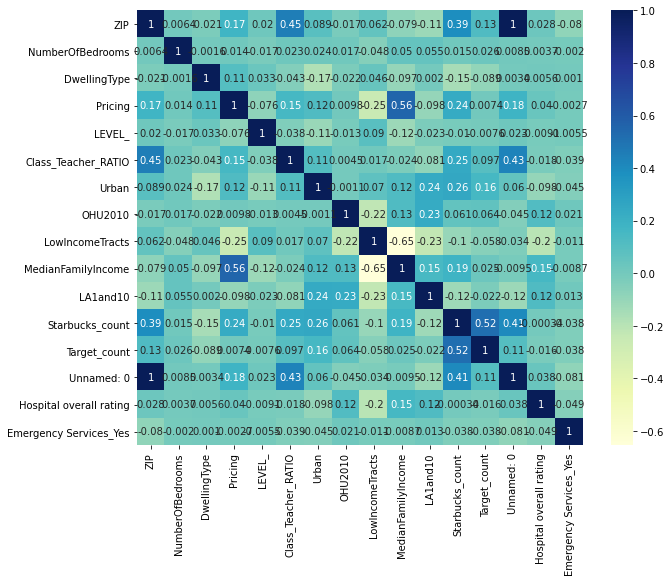

In [150]:
#Visually represent collinearity
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [151]:
df.describe()

,ZIP,NumberOfBedrooms,DwellingType,Pricing,LEVEL_,Class_Teacher_RATIO,Urban,OHU2010,LowIncomeTracts,MedianFamilyIncome,LA1and10,Starbucks_count,Target_count,Unnamed: 0,Hospital overall rating,Emergency Services_Yes
count,62909.000000,62909.000000,61722.000000,6.172200e+04,55064.000000,55064.000000,49551.000000,49551.000000,49551.000000,49551.000000,49551.000000,55064.000000,55064.000000,11658.000000,11658.000000,11658.000000
mean,48031.398830,3.166129,1.663281,2.419257e+05,1.639547,16.809194,0.833232,1727.753770,0.317712,78058.574720,0.424238,1.346143,0.178992,1694.990650,3.019729,0.976554
std,31051.620363,1.147363,0.472592,2.328879e+05,0.438199,5.741230,0.300020,504.886341,0.343505,31259.330566,0.342341,1.885507,0.383349,1104.151727,0.824239,0.145329
min,1001.000000,1.000000,1.000000,3.041169e+04,1.000000,1.451613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000,0.000000
25%,21222.000000,2.000000,1.000000,1.212510e+05,1.375000,13.879836,0.800000,1414.700000,0.000000,55859.000000,0.090909,0.000000,0.000000,685.000000,2.500000,1.000000
50%,44319.000000,3.000000,2.000000,1.744094e+05,1.600000,15.844018,1.000000,1671.000000,0.200000,71769.000000,0.400000,1.000000,0.000000,1617.000000,3.000000,1.000000
75%,78754.000000,4.000000,2.000000,2.825323e+05,1.928571,18.629032,1.000000,1978.666667,0.571429,95062.500000,0.666667,2.000000,0.000000,2838.000000,4.000000,1.000000
max,99901.000000,5.000000,2.000000,4.536160e+06,4.000000,421.000000,1.000000,8705.000000,1.000000,250000.000000,1.000000,21.000000,1.000000,3368.000000,5.000000,1.000000


Save datasets to csv

In [ ]:
### Save the features dataset
df.to_csv('CleanHouse.csv') 

In [ ]:
### Save the final zillow dataset with features
df.to_csv('CleanHouseFinal.csv')

In [ ]:
### Load the data
#df = pd.read_csv('/Users/sunny/Data mining/final project/US_HousingData-/docs/CleanHouse.csv')
#df = pd.read_csv('CleanHouseFinal.csv')

In [ ]:
#Final Clean dataset
df.head()

In [ ]:
df = df.drop(df.columns[1], axis =1)

In [ ]:
df.shape

In [ ]:
df.head()

### Dimensional Reduction & Quick Analysis

#### Before impute in featuer engineering, attempt KDE
How data is distributed at high level and potential data generation for specific features. Test different features. 

In [ ]:
#Plot one-dimension data ()
from sklearn.neighbors import KernelDensity

# Gaussian KDE with Seaborn bandwidth
kde = KernelDensity(kernel='gaussian', bandwidth=bw)

# Grab the data, and compute the support (sampling points)
x = dataset['SepalLengthCm']
support = np.linspace(3, 9, len(x))

# Create the KDE, and return the support values.
kde.fit(x[:, np.newaxis])
y = kde.score_samples(support[:, np.newaxis])

# Plot the results including underlying histogram
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(x, bins=10, alpha=0.5, color=sns.xkcd_rgb["denim blue"], normed=True)
ax.plot(support, np.exp(y))
plt.xlabel('Sepal Length', fontsize=14)
plt.title('Kernel Density Plot', fontsize=14)

sns.despine(offset=5, trim=True)
plt.show()


In [ ]:
#If want to test for different bandwidth selection
# Compare the impact of bandwidth selection on a KDE
from sklearn.neighbors import KernelDensity

# Make plots
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(x, bins=10, alpha=0.5, color=sns.xkcd_rgb["denim blue"], normed=True, label='')

# Gaussian KDE with varying bandwidths
for bw in np.linspace(0.1, 0.9, 4):
    kde = KernelDensity(kernel='gaussian', bandwidth=bw)
    kde.fit(x[:, np.newaxis])
    y = kde.score_samples(support[:, np.newaxis])
    ax.plot(support, np.exp(y), label='bw = {0:3.1f}'.format(bw))

# Decorate plot
plt.xlabel('Sepal Length', fontsize=14)
plt.title('Kernel Density Plot', fontsize=14)
plt.legend()

sns.despine(offset=5, trim=True)
plt.show()

In [ ]:
#In event that want to use this data generation, can sample from scikit learn KDE model
# We can now sample from the scikit learn KDE model
for val in kde.sample(n_samples=15):
    print('{0:4.1f}, '.format(val[0]), end='')

#### PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [ ]:
def scaled(df):
    return pd.DataFrame(StandardScaler().fit_transform(df), columns = df.columns)

train_standardized = scaled(df)

In [ ]:
def fit_pca(df, n_components):
    pca = PCA(n_components)  
    pca = pca.fit(df)  #fit the PCA model to the df (which will be the original, non-reduced df when used below)
    
    return pca

In [ ]:
# we keep only 10 components
n_components = 10
pca = fit_pca(train_standardized, n_components=n_components)

In [ ]:
def plot_scaled_variance(pca):
    #same as above, create a subplot, decorate the plot, and show the percentage of variance
    fig, ax = plt.subplots(figsize=(10, 6)) 
    ax.set_xlabel('Dimension #')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_title('Fraction of Explained Variance')
    ax.plot(pca.explained_variance_ratio_)   
    
    return ax

In [ ]:
ax = plot_scaled_variance(pca)

#### Cluster using DBSCAN

In [ ]:
#Import StandardScaler
from sklearn.preprocessing import StandardScaler
#Just compare loan_amount and loan_grade
data_loangrade_cluster = data[['loan_amount', 'loan_grade']]
#turn to matrix
data_loangrade_cluster = data_loangrade_cluster.as_matrix().astype("float32", copy = False)

#Create a standardizer
data_standardized = StandardScaler().fit_transform(data_loangrade_cluster)

In [ ]:
#Apply k-nearest to determine best suitable esp neighborhood for DBSCAN (the knee in the plot)
#min.sample = # of dimensions + 1 --> 2+1 = 3. Use 3 to start with. 
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=2).fit(data_standardized)
distances, indices = nbrs.kneighbors(data_standardized)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
from matplotlib import pyplot as plt

#fit data to DBSCAN function. In this case use radius (aka epsilon) of 0.01 per k-nearest and min_samples of 5
dbsc = DBSCAN(eps = 0.01, min_samples = 5).fit(data_standardized)
#Get the cluster labels
labels = dbsc.labels_
#Identify the core and border points
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

#Pair labels with colors
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

#Plot the data 
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = data_standardized[class_member_mask & core_samples]  
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    xy2 = data_standardized[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, markersize = 5)
    
#Decorate the plot
plt.title("DBSCAN on Standardized Loan data")
plt.xlabel("Feature1")
plt.ylabel("Feature2")

### Feature Engineering
https://pypi.org/project/autoimpute/

The challenge we have is severity of missing values. So the solutions is impute missing data. 

Three imputation methods for severe missing data problems:

1. Use tree-based models since are a reasonable choice for an imputation technique since a tree can be constructed in the presence of other missing data.
2. Linear imputation to impute numeric variables. Logistic regression for a categorical features.(computationally expensive and time consuming)
3. Employed FAMD algorithm, one of most recent way to deal with the high dimentional missing data. There is one good paper published on 2016. 'A principal component method to impute missingvalues for mixed data', I upload to the github.
We can use two libraries to apply FAMD algorithm, Light_FAMD https://pypi.org/project/light-famd/ or 
prince https://github.com/MaxHalford/prince

However, we still need to realized that we are building a predictive model, the value of predictive model lie on their ability to accurately predict yet-to-be-seen samples (including the test set and new unknown samples), as opposed to statistical appropriateness, it is critical that the imputed values be as close as possible to their true (unobserved) values. 

In [ ]:
pip install Light_FAMD

In [ ]:
pip install prince

### Balancing Imbalanced Dataset

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import LocalOutlierFactor
from pylab import rcParams
from sklearn.model_selection import train_test_split
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [ ]:
data = df
data.columns.tolist()

In [ ]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
state = np.random.RandomState(42)
columns = [c for c in columns if c not in ["CHANGE TO HOUSE PRICE"]]
# Store the variable we are predicting 
target = "CHANGE TO HOUSE PRICE"

In [ ]:
X = data.drop("CHANGE TO HOUSE PRICE",axis=1)
Y = data['CHANGE TO HOUSE PRICE']
print(X.shape)
print(Y.shape)

In [ ]:
#Finding if any any null values present
data.isnull().values.any()

In [ ]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
## Get the Fraud and the normal dataset 

fraud = data[data['Class']==1]

normal = data[data['Class']==0]
print(fraud.shape,normal.shape)

Apply model before sampling

In [ ]:
#Splitting the main data into 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=27)

In [ ]:
print(X_train.shape, y_train.shape)

In [ ]:
## Get the Fraud and the normal dataset 

train_fraud = y_train[y_train==1]

train_normal = y_train[y_train==0]
print(train_fraud.shape,train_normal.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)

In [ ]:
from sklearn import metrics
y_pred = lr.predict(X_test)
print("Accuracy of LR classifier on test set is {}".format(lr.score(X_test,y_test)))

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of LR classifier on test set is {}".format(accuracy_score(y_test,y_pred)))

In [ ]:
pd.crosstab(y_test,y_pred)

In [ ]:
print("Percentage of correct classification of 0(Non_fraud) is {}".format(56846/56858))
print("Percentage of correct classification of 1(fraud) is {}".format(65/104))

Balance data using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto')

X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

X_train_sm.shape, y_train_sm.shape

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_sm)))

Apply model after SMOTE

In [ ]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_sm,y_train_sm)

y_pred = lr.predict(X_test)
print("Accuracy of LR classifier on test set after oversampling is {}".format(accuracy_score(y_test,y_pred)))

In [ ]:
pd.crosstab(y_test,y_pred)

In [ ]:
print("Percentage of correct classification of 0(Non_fraud) is {}".format(55981/56858))
print("Percentage of correct classification of 1(fraud) is {}".format(91/104))

### Model Training

In [ ]:
#(test as much algorithm as possible, possible models include Random Forest, Gradient Boosting, Ada-Boosting, Voting Classifier...)

#### Linear Regression Model

X and y 

Standardized variables to consider: train_X, train_y, test_X, test_y

Non standardized variables to consider: X_train, X_test, y_train, y_test

In [ ]:
#Instantiate function
regressor = LinearRegression() 

In [ ]:
#fit the model with training data
regressor.fit(train_X, train_y)

In [ ]:
# Compute y predictor: predict the target (Y) on the testing dataset
pred_y = regressor.predict(test_X)

Desired Error

In [ ]:
## Evaluate the RMSE on the testing dataset to get the desired error
# Compute mse
mse = MSE(test_y, pred_y)

# Compute rmse & multiply by 100 because I turned % values to decimal which will affect the MSE/RMSE score
rmse = (mse**(1/2))*100

# Print rmse
print("Test set RMSE of dt: {:.2f}".format(rmse))

Linear Regression: Training Error

In [ ]:
#predict the target on the train dataset
y_pred_train = regressor.predict(train_X)

##Evaluate RMSE on the training dataset to get the training error
#Compute mse
mse = MSE(train_y, y_pred_train)

#Compute rmse & multiply by 100 because I turned % values to decimal which will affect the MSE/RMSE score
RMSE_train = (mse**(1/2))*100

#Print RMSE train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Linear Regression: Cross Validation

In [ ]:
## Cross Validate 
from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(regressor, train_X, train_y, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE & multiply by 100 because I turned % values to decimal which will affect the MSE/RMSE score
RMSE_CV = ((MSE_CV_scores.mean())**(1/2))*100

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

#### Decision Tree

In [ ]:
# Import DecisionTreeRegressor from sklearn.tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
import sklearn.model_selection as cv
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

Hyperparameter Tuning

In [ ]:
#apply cv.train_test (produce new split here)
(X_train, X_test, y_train, y_test) = cv.train_test_split(X, y, test_size=.20)

In [ ]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]
max_depth.append(None)

# Minimum number of samples required at each leaf node
min_samples_leaf = [0.05, 0.10, 0.13, 0.15, 0.20, 0.26, 0.5]

# Create the random grid
random_grid = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dt = DecisionTreeRegressor()

# Random search of parameters, using 10 fold cross validation, 
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, cv = 10, random_state=3, n_jobs = -1)
#dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=3, n_jobs = -1)

# Fit the random search model
dt_random.fit(X_train, y_train)

In [ ]:
#See what best parameters from fitting the random search: 
dt_random.best_params_

Decision Tree

In [ ]:
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=4,
                           min_samples_leaf=0.1,
                           random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

Decision Tree: Desired error

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt & multiply by 100 because I turned % values to decimal which will affect the MSE/RMSE score
rmse_dt = (mse_dt**(1/2))*100

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Decision Tree: Training Error

In [ ]:
from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE & multiply by 100 because I turned % values to decimal which will affect the MSE/RMSE score
RMSE_CV = ((MSE_CV_scores.mean())**(1/2)) * 100

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

Decision Tree: Training Error

In [ ]:
# Fit dt to the training set
#dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt & multiply by 100 because I turned % values to decimal which will affect the MSE/RMSE score
RMSE_train = ((MSE(y_train, y_pred_train))**(1/2))*100

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

In [ ]:
def feat_importances(m, df):
        
    return pd.DataFrame({'cols':df.columns, 'feat_imp': m.feature_importances_}
                       ).sort_values('feat_imp', ascending=False)

def plot_fi(fi): return fi.plot('cols', 'feat_imp', 'barh', figsize=(12,7), legend=False)

In [ ]:
feature = feat_importances(dt,X_train)
plot_fi(feature).figure.savefig('fi_importance_dt')

#### Random Forest

In [ ]:
# Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
# Set seed for reproducibility
SEED = 1
# Split dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

Hyperparameter Tuning

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [0.05, 0.10, 0.13, 0.15, 0.20, 0.26, 0.5]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 10, random_state=3, n_jobs = -1)
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=3, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
#See what best parameters from fitting the random search: 
dt_random.best_params_

In [ ]:
# Instantiate a random forests regressor 'rf' 600 estimators
rf = RandomForestRegressor(n_estimators=600,
min_samples_leaf=0.01,
random_state=SEED)

# Fit 'rf' to the training set
rf.fit(X_train, y_train)

Random Forest: Desired Error

In [ ]:
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE & multiply by 100 because I turned % values to decimal which will affect the MSE/RMSE score
rmse_test = (MSE(y_test, y_pred)**(1/2))*100

# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Random Forest: Train Error

In [ ]:
# Predict the train features
y_pred_train=rf.predict(X_train)

# Evaluate the train set RMSE & multiply by 100 because I turned % values to decimal which will affect the MSE/RMSE score
rmse_train = (MSE(y_train, y_pred_train)**(1/2))*100

# Print the train set RMSE
print('Train set RMSE of rf: {:.2f}'.format(rmse_train))

In [ ]:
#Don't need to do cross-validation when using random forest because mutliple bagging in process of training random forest 
#prevents over-fitting.
import pandas as pd
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_,
index = X.columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue')
plt.show()

In [ ]:
feature = feat_importances(rf,X_train)
plot_fi(feature).figure.savefig('fi_importance_rf')

#### Support Vector Machines (SVM)

In [ ]:
#Important Note: X=pca.fit_transform(data) (USE PCA from above)

#Determine best parameters
from sklearn.model_selection import GridSearchCV

svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1,1,2]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X, y)

# Report the best parameters
print("Best CV params", searcher.best_params_)

In [ ]:
#Determine best parameters

# split X and y into training and testing sets
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings("ignore")

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log'], 'penalty':['l1','l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

In [ ]:
#Test
from sklearn.metrics import classification_report
#import sklearn.cross_validation as cv (if you are using an earlier version)
import sklearn.model_selection as cv
(x_train, x_test, y_train, y_test) = cv.train_test_split(X, y, test_size=.25)

# Next lets try Linear SVM
from sklearn import svm

svc = svm.SVC(kernel='linear', C=1)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(classification_report(y_test, y_pred, \
                            target_names = ['Setosa', 'Versicolor', 'Virginica']))

In [ ]:
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(x_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(x_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(x_train, y_train)
lin_svc = svm.LinearSVC(C=C).fit(x_train,y_train)

In [ ]:
y_pred=rbf_svc.predict(x_test)
print(classification_report(y_test, y_pred, \
                            target_names = ['Setosa', 'Versicolor', 'Virginica']))

In [ ]:
#fit actual data 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('PCA_1')
    plt.ylabel('PCA_2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

EA SVR

In [ ]:
# Instantiate Support Vector Regressor
sv = SVR(kernel = 'rbf')

# Fit the data to the training set
sv.fit(x_train, y_train)

# Predict test set labels
sv_y_pred = sv.predict(x_test)
print(sv_y_pred[0:10])

In [ ]:
# Compute rmse_dt and R2
r2_dt = r2_score(y_test, sv_y_pred)
rmse_dt = MSE(y_test, sv_y_pred)**(1/2)
print(rmse_dt, r2_dt)

In [ ]:
# Compute rmse_dt
mseCV_DT = cross_val_score(sv, x_train,y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rmseCV_DT = (-mseCV_DT.mean())**(1/2)
print("RMSE score:", rmseCV_DT)

#### Gradient Boosting

In [ ]:
# Instantiate Gradient Boosting
gb = GradientBoostingRegressor(random_state=0)

# Fit the data to the training set
gb.fit(x_train, y_train)

# Predict test set labels
gb_y_pred = gb.predict(x_test)
print(gb_y_pred[0:10])

In [ ]:
# Compute rmse_dt and R2
r2_dt = r2_score(y_test, gb_y_pred)
rmse_dt = MSE(y_test, gb_y_pred)**(1/2)
print(rmse_dt, r2_dt)

In [ ]:
# Compute rmse_dt
mseCV_DT = cross_val_score(gb, x_train,y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rmseCV_DT = (-mseCV_DT.mean())**(1/2)
print("RMSE score:", rmseCV_DT)

### KNN for regression
https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

In [ ]:
#Create train and test set
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [ ]:
#Preprocessing-Scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)
 

In [ ]:
#Look at error rate for different K values
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#Predictions on the test dataset
#reading test and submission files
test = pd.read_csv('test.csv')
submission = pd.read_csv('SampleSubmission.csv')
submission['Item_Identifier'] = test['Item_Identifier']
submission['Outlet_Identifier'] = test['Outlet_Identifier']

#preprocessing test dataset
test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
test['Item_Weight'].fillna(mean, inplace =True)
test = pd.get_dummies(test)
test_scaled = scaler.fit_transform(test)
test = pd.DataFrame(test_scaled)

#predicting on the test set and creating submission file
predict = model.predict(test)
submission['Item_Outlet_Sales'] = predict
submission.to_csv('submit_file.csv',index=False)

In [ ]:
#To decide value of k, implement GridsearchCV
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

### Save model to pickle

In [ ]:
#To save model to pickle import
import pickle

#Save
model_rf_file = open("FinalProjectModel.pkl", "wb")
pickle.dump(rf, model_rf_file)

#### Load and apply model

In [ ]:
#loading
model_rf_file = open('FinalProjectModel.pkl', 'rb')
rf_pi2 = pickle.load(model_rf_file)

In [ ]:
#Apply the model: use loaded picked model to make predictions
#this is the code used to apply the model used to make predictions.  
y_pred_train = rf_pi2.predict(X_test)

In [ ]:
print(y_pred_train)

### Model Accuracy Testing

In [ ]:
#Split test data 
X_Htest, y_Htest  = test_holdout.drop(['loan_interest_rate'], axis =1), test_holdout['loan_interest_rate'] 

In [ ]:
#Predict 
y_pred_rf = rf_pi2.predict(X_Htest)
print(y_pred_rf)

In [ ]:
final_data = pd.DataFrame(data = y_pred_rf, columns=['loan_interest_rate'])

In [ ]:
final_data.head()

In [ ]:
final_data['loan_interest_rate'] = final_data['loan_interest_rate'].mul(100).round(2).astype(str)+'%'

In [ ]:
final_data.head()

In [ ]:
#Save Results to csv
final_data.to_csv("FinalProjectResults.csv",index=False)